                             multiple linear regression model on bikes sharing dataset 

In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
boombikes = pd.read_csv("day.csv")
boombikes

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
boombikes.shape

(730, 16)

In [6]:
boombikes.drop(['casual','atemp','registered','instant','dteday'],inplace=True,axis=1)
boombikes

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,65.2917,23.458911,2114
726,1,1,12,0,6,0,2,10.386653,59.0000,10.416557,3095
727,1,1,12,0,0,0,2,10.386653,75.2917,8.333661,1341
728,1,1,12,0,1,1,1,10.489153,48.3333,23.500518,1796


# EDA


<function matplotlib.pyplot.show(close=None, block=None)>

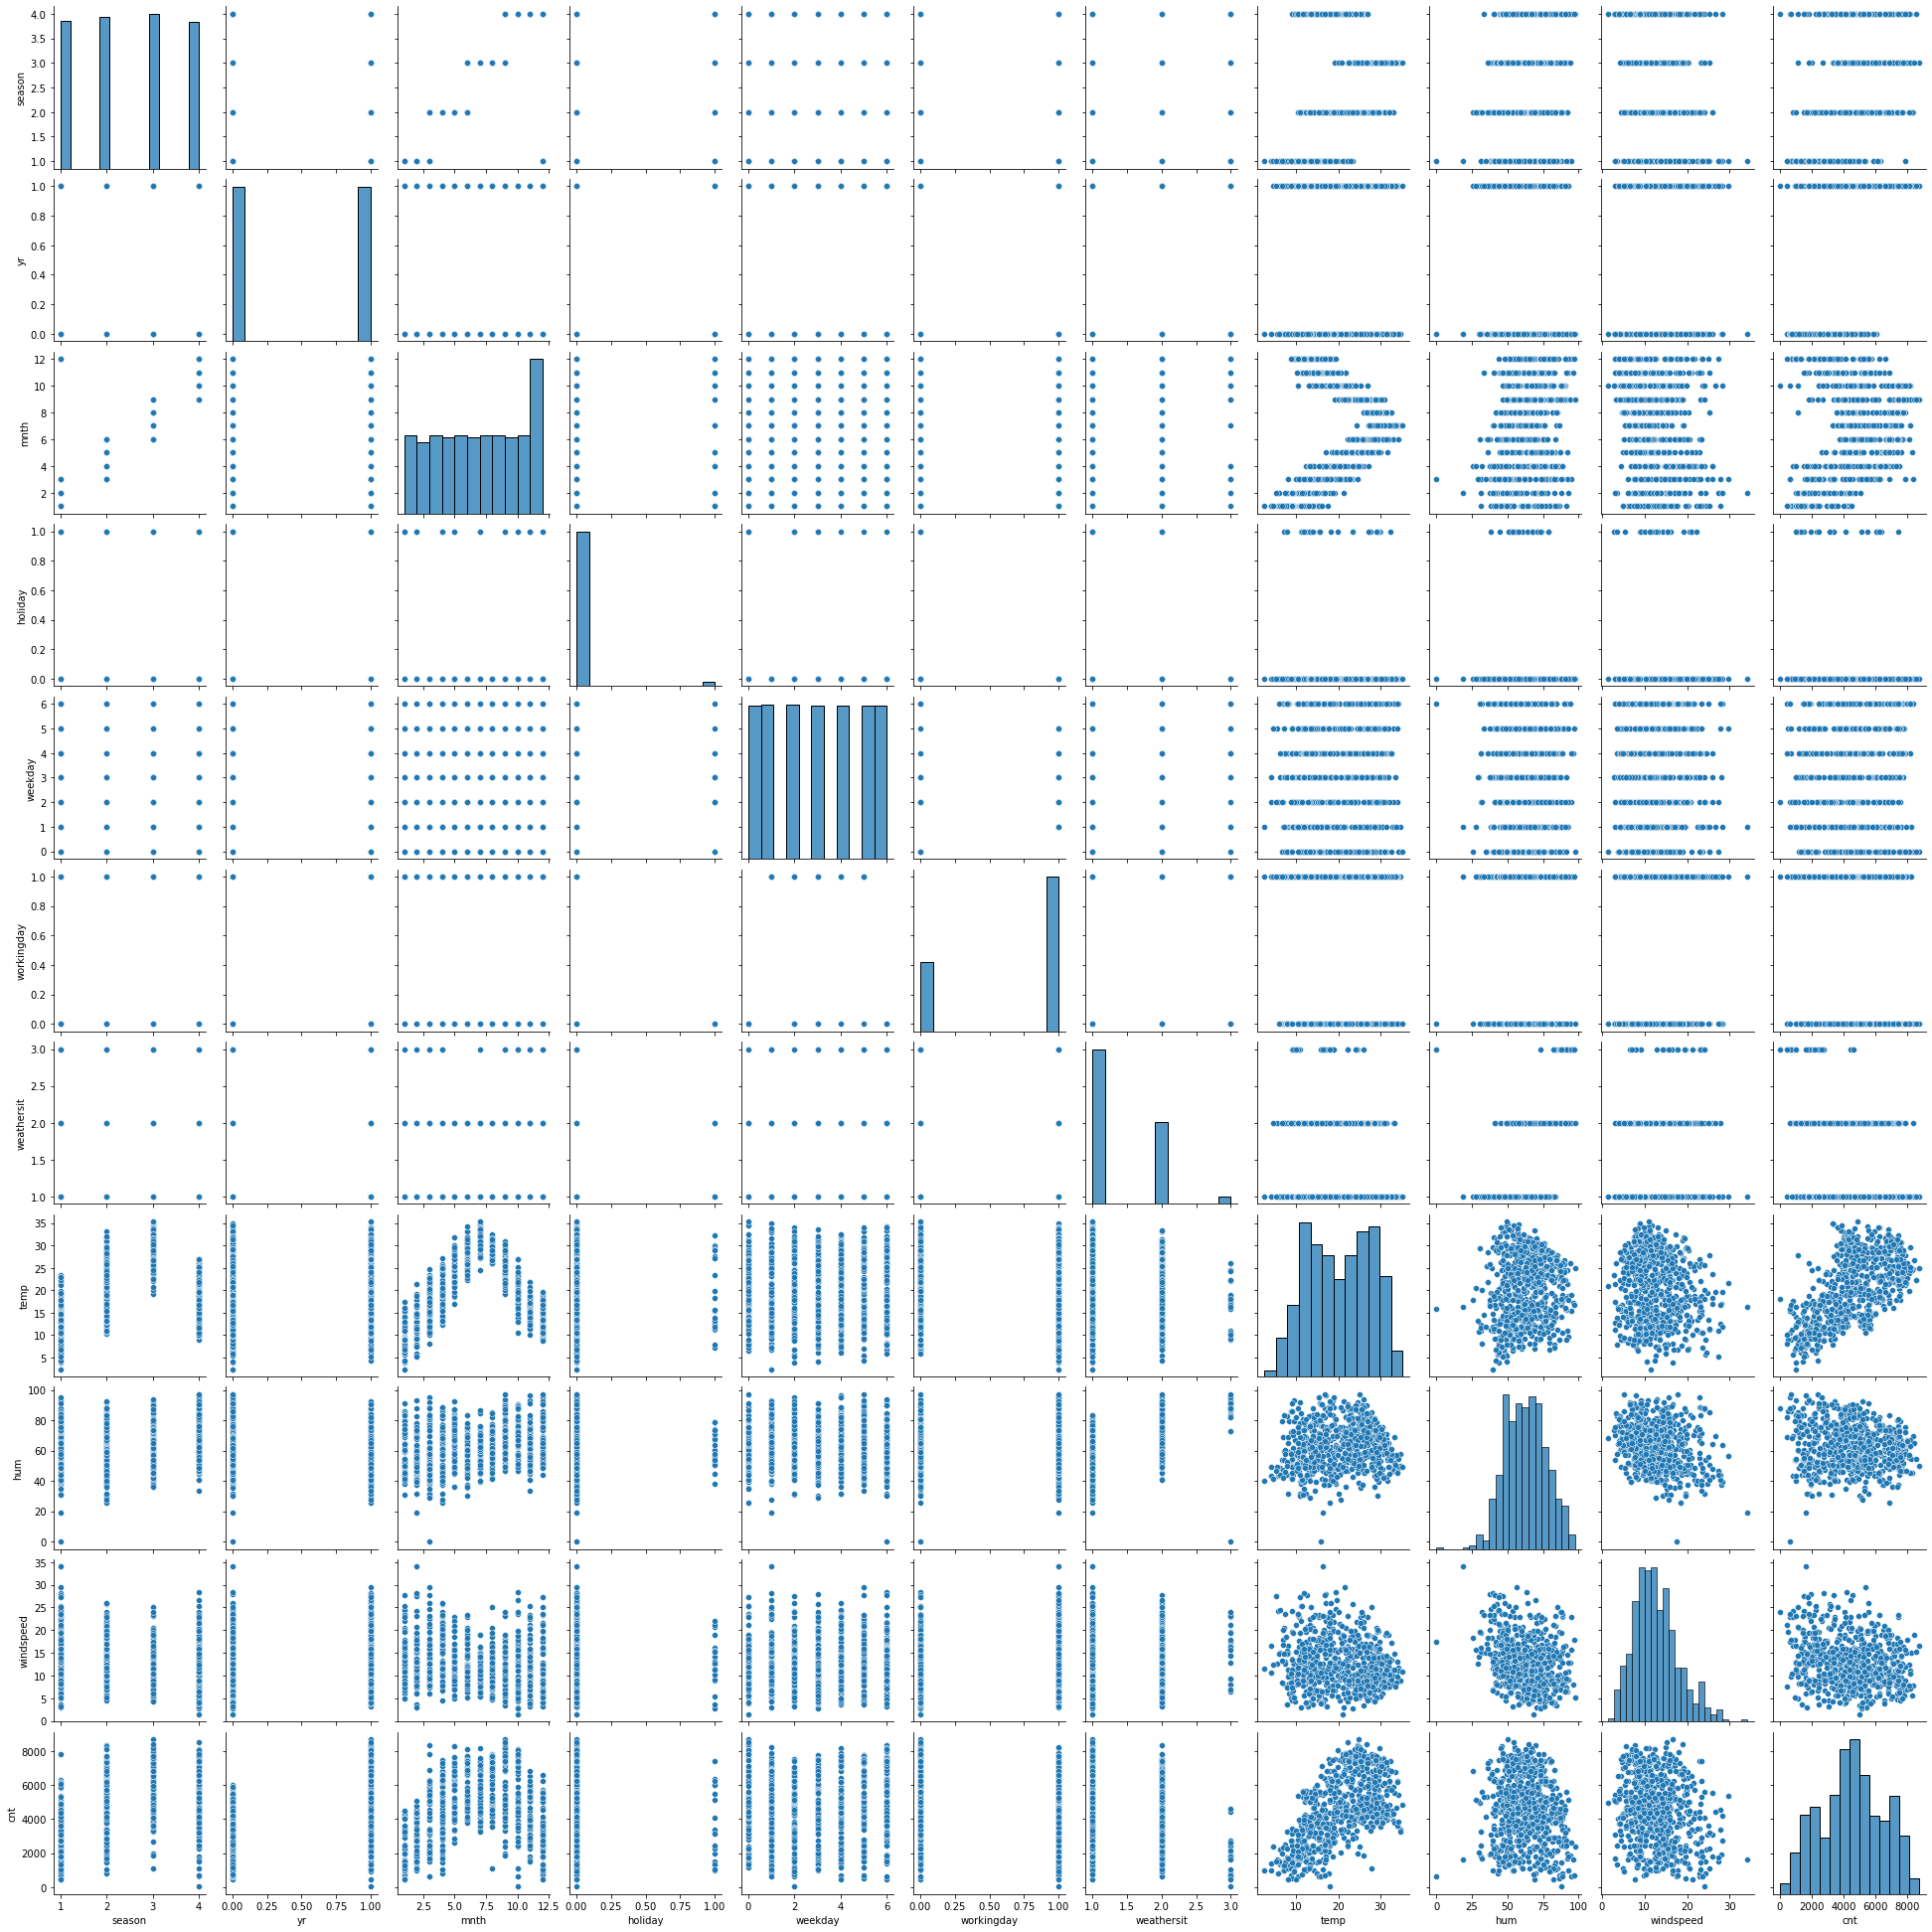

In [7]:
sns.pairplot(boombikes)
plt.show

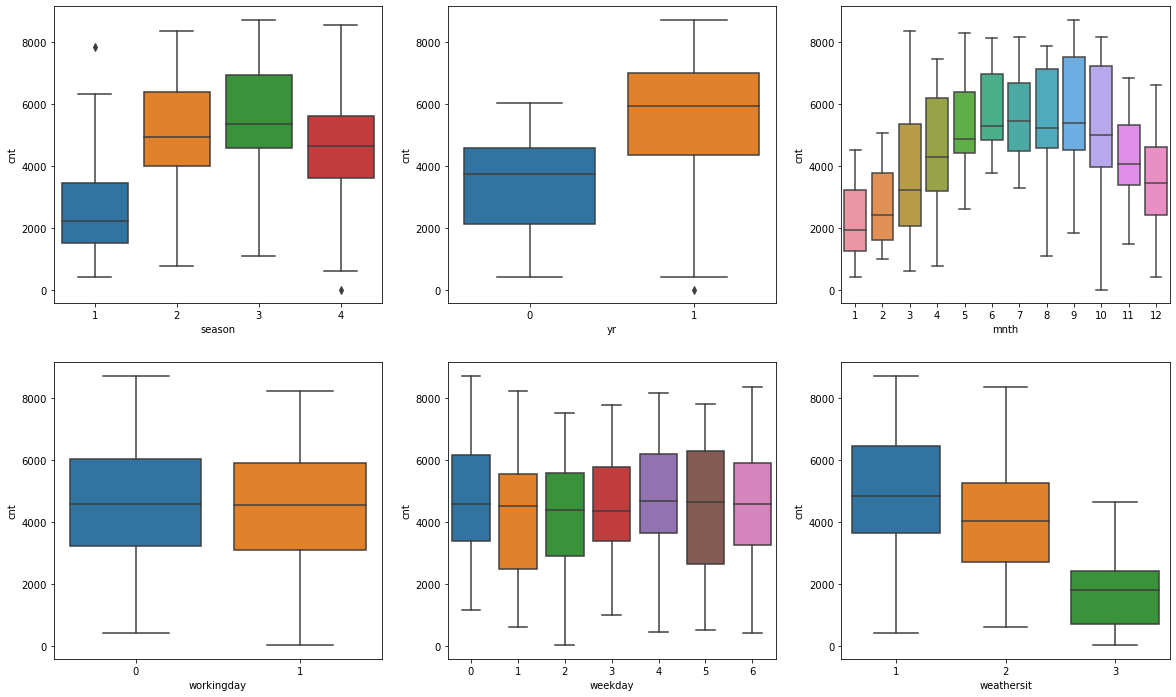

In [8]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = boombikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = boombikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = boombikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = boombikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = boombikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boombikes)
plt.show()

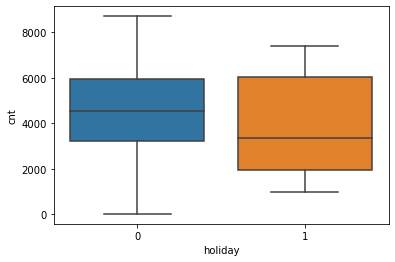

In [9]:
sns.boxplot(x = 'holiday', y = 'cnt', data = boombikes)
plt.show()

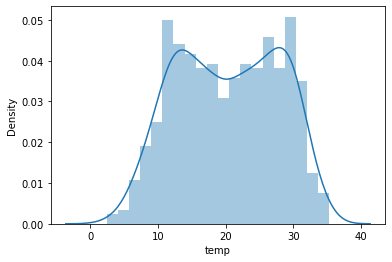

In [10]:
sns.distplot(boombikes.temp,bins=20)
plt.show()

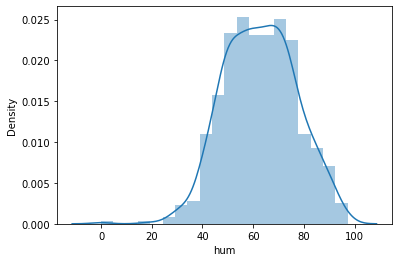

In [11]:
sns.distplot(boombikes.hum,bins=20)
plt.show()

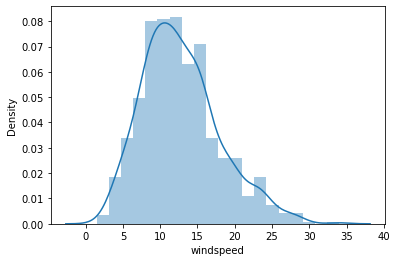

In [12]:
sns.distplot(boombikes.windspeed,bins=20)
plt.show()

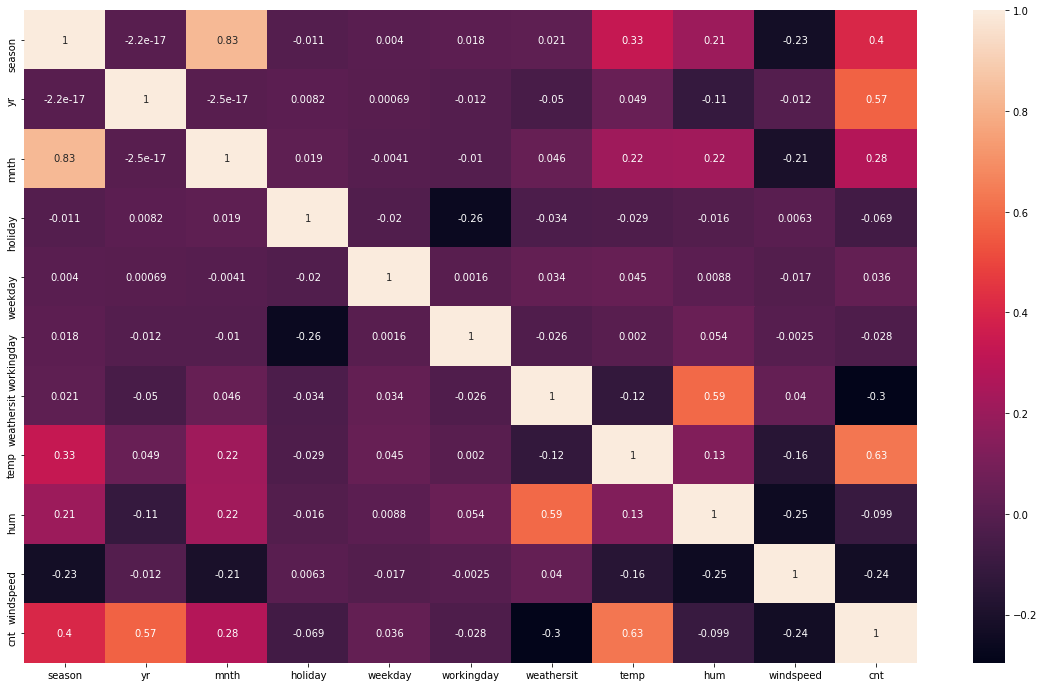

In [13]:
plt.figure(figsize=(20, 12))
sns.heatmap(boombikes.corr(),annot=True)
plt.show()

# Dummy variables

In [14]:
varlist=["weathersit"]
def category_map(x):
    return x.map({1:"clear",2:"mist",3:"light snow",4:"Heavy rain"})
boombikes[varlist]=boombikes[varlist].apply(category_map)
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,mist,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,mist,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,clear,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,clear,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,clear,9.305237,43.6957,12.522300,1600


In [15]:

boom = pd.get_dummies(boombikes["weathersit"])
boom

,clear,light snow,mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,0,0,1
726,0,0,1
727,0,0,1
728,1,0,0


In [16]:
boombikes1 = pd.concat([boombikes, boom], axis = 1)

In [17]:
boombikes1

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,clear,light snow,mist
0,1,0,1,0,1,1,mist,14.110847,80.5833,10.749882,985,0,0,1
1,1,0,1,0,2,1,mist,14.902598,69.6087,16.652113,801,0,0,1
2,1,0,1,0,3,1,clear,8.050924,43.7273,16.636703,1349,1,0,0
3,1,0,1,0,4,1,clear,8.200000,59.0435,10.739832,1562,1,0,0
4,1,0,1,0,5,1,clear,9.305237,43.6957,12.522300,1600,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,mist,10.420847,65.2917,23.458911,2114,0,0,1
726,1,1,12,0,6,0,mist,10.386653,59.0000,10.416557,3095,0,0,1
727,1,1,12,0,0,0,mist,10.386653,75.2917,8.333661,1341,0,0,1
728,1,1,12,0,1,1,clear,10.489153,48.3333,23.500518,1796,1,0,0


In [18]:
varlist1=["mnth"]
def category_map(x):
    return x.map({1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:"jun",7:"jul",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"})
boombikes1[varlist1]=boombikes1[varlist1].apply(category_map)
boombikes1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,clear,light snow,mist
0,1,0,jan,0,1,1,mist,14.110847,80.5833,10.749882,985,0,0,1
1,1,0,jan,0,2,1,mist,14.902598,69.6087,16.652113,801,0,0,1
2,1,0,jan,0,3,1,clear,8.050924,43.7273,16.636703,1349,1,0,0
3,1,0,jan,0,4,1,clear,8.200000,59.0435,10.739832,1562,1,0,0
4,1,0,jan,0,5,1,clear,9.305237,43.6957,12.522300,1600,1,0,0


In [19]:

boom1 = pd.get_dummies(boombikes1["mnth"])
boom1

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,1,0,0,0,0,0,0,0,0,0
726,0,0,1,0,0,0,0,0,0,0,0,0
727,0,0,1,0,0,0,0,0,0,0,0,0
728,0,0,1,0,0,0,0,0,0,0,0,0


In [20]:
boombikes2 = pd.concat([boombikes1, boom1], axis = 1)
boombikes2

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1,0,jan,0,1,1,mist,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,1,0,jan,0,2,1,mist,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,1,0,jan,0,3,1,clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,1,0,jan,0,4,1,clear,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,1,0,jan,0,5,1,clear,9.305237,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,dec,0,5,1,mist,10.420847,65.2917,23.458911,...,1,0,0,0,0,0,0,0,0,0
726,1,1,dec,0,6,0,mist,10.386653,59.0000,10.416557,...,1,0,0,0,0,0,0,0,0,0
727,1,1,dec,0,0,0,mist,10.386653,75.2917,8.333661,...,1,0,0,0,0,0,0,0,0,0
728,1,1,dec,0,1,1,clear,10.489153,48.3333,23.500518,...,1,0,0,0,0,0,0,0,0,0


In [21]:
varlist2=["weekday"]
def category_map(x):
    return x.map({0:"sun",1:"mon",2:"tue",3:"wed",4:"thurs",5:"fri",6:"sat"})
boombikes2[varlist2]=boombikes2[varlist2].apply(category_map)
boombikes2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1,0,jan,0,mon,1,mist,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,1,0,jan,0,tue,1,mist,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,1,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,1,0,jan,0,thurs,1,clear,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,1,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [22]:

boom2 = pd.get_dummies(boombikes2["weekday"])
boom2

,fri,mon,sat,sun,thurs,tue,wed
0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
725,1,0,0,0,0,0,0
726,0,0,1,0,0,0,0
727,0,0,0,1,0,0,0
728,0,1,0,0,0,0,0


In [23]:
boombikes3 = pd.concat([boombikes2, boom2], axis = 1)
boombikes3

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,nov,oct,sep,fri,mon,sat,sun,thurs,tue,wed
0,1,0,jan,0,mon,1,mist,14.110847,80.5833,10.749882,...,0,0,0,0,1,0,0,0,0,0
1,1,0,jan,0,tue,1,mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,1,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,1
3,1,0,jan,0,thurs,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,1,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,dec,0,fri,1,mist,10.420847,65.2917,23.458911,...,0,0,0,1,0,0,0,0,0,0
726,1,1,dec,0,sat,0,mist,10.386653,59.0000,10.416557,...,0,0,0,0,0,1,0,0,0,0
727,1,1,dec,0,sun,0,mist,10.386653,75.2917,8.333661,...,0,0,0,0,0,0,1,0,0,0
728,1,1,dec,0,mon,1,clear,10.489153,48.3333,23.500518,...,0,0,0,0,1,0,0,0,0,0


In [24]:
varlist3=["season"]
def category_map(x):
    return x.map({1:"spring",2:"summer",3:"fall",4:"winter"})
boombikes3[varlist3]=boombikes3[varlist3].apply(category_map)
boombikes3.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,nov,oct,sep,fri,mon,sat,sun,thurs,tue,wed
0,spring,0,jan,0,mon,1,mist,14.110847,80.5833,10.749882,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,jan,0,tue,1,mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,jan,0,thurs,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,...,0,0,0,1,0,0,0,0,0,0


In [25]:

boom3 = pd.get_dummies(boombikes3["season"])
boom3

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
725,0,1,0,0
726,0,1,0,0
727,0,1,0,0
728,0,1,0,0


In [26]:
boombikes4 = pd.concat([boombikes3, boom3], axis = 1)
boombikes4

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mon,sat,sun,thurs,tue,wed,fall,spring,summer,winter
0,spring,0,jan,0,mon,1,mist,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,0,1,0,0
1,spring,0,jan,0,tue,1,mist,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,1,0,0
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,1,0,1,0,0
3,spring,0,jan,0,thurs,1,clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,fri,1,mist,10.420847,65.2917,23.458911,...,0,0,0,0,0,0,0,1,0,0
726,spring,1,dec,0,sat,0,mist,10.386653,59.0000,10.416557,...,0,1,0,0,0,0,0,1,0,0
727,spring,1,dec,0,sun,0,mist,10.386653,75.2917,8.333661,...,0,0,1,0,0,0,0,1,0,0
728,spring,1,dec,0,mon,1,clear,10.489153,48.3333,23.500518,...,1,0,0,0,0,0,0,1,0,0


In [27]:
# Drop 'furnishingstatus' as we have created the dummies for it
boombikes4.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [28]:
boombikes4

,yr,holiday,workingday,temp,hum,windspeed,cnt,clear,light snow,mist,...,mon,sat,sun,thurs,tue,wed,fall,spring,summer,winter
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,0,0,1,...,0,0,0,0,0,0,0,1,0,0
726,1,0,0,10.386653,59.0000,10.416557,3095,0,0,1,...,0,1,0,0,0,0,0,1,0,0
727,1,0,0,10.386653,75.2917,8.333661,1341,0,0,1,...,0,0,1,0,0,0,0,1,0,0
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,1,0,0,0,0,0,0,1,0,0


# Splitting the data

In [29]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(boombikes4, train_size = 0.7, test_size = 0.3, random_state = 100)

# Scalling 

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [31]:
num_vars = ['yr','workingday','temp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,clear,light snow,mist,...,mon,sat,sun,thurs,tue,wed,fall,spring,summer,winter
653,1.0,0,1.0,0.509887,0.575354,0.300794,0.864243,1,0,0,...,0,0,0,0,0,1,0,0,0,1
576,1.0,0,1.0,0.815169,0.725633,0.264686,0.827658,1,0,0,...,0,0,0,0,0,1,1,0,0,0
426,1.0,0,0.0,0.442393,0.640189,0.255342,0.465255,0,0,1,...,0,0,1,0,0,0,0,1,0,0
728,1.0,0,1.0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,1,0,0
482,1.0,0,0.0,0.395666,0.504508,0.188475,0.482973,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,0,1.0,0.824514,0.605840,0.355596,0.764151,0,0,1,...,0,0,0,0,1,0,0,0,1,0
578,1.0,0,1.0,0.863973,0.679690,0.187140,0.832835,1,0,0,...,0,0,0,0,0,0,1,0,0,0
53,0.0,0,1.0,0.202618,0.435939,0.111379,0.218017,1,0,0,...,0,0,0,0,0,0,0,1,0,0
350,0.0,0,1.0,0.248216,0.577930,0.431816,0.312586,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [32]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,clear,light snow,mist,...,mon,sat,sun,thurs,tue,wed,fall,spring,summer,winter
653,1.0,0,1.0,0.509887,0.575354,0.300794,0.864243,1,0,0,...,0,0,0,0,0,1,0,0,0,1
576,1.0,0,1.0,0.815169,0.725633,0.264686,0.827658,1,0,0,...,0,0,0,0,0,1,1,0,0,0
426,1.0,0,0.0,0.442393,0.640189,0.255342,0.465255,0,0,1,...,0,0,1,0,0,0,0,1,0,0
728,1.0,0,1.0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,1,0,0
482,1.0,0,0.0,0.395666,0.504508,0.188475,0.482973,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [33]:
y_train = df_train.pop('cnt')
X_train = df_train

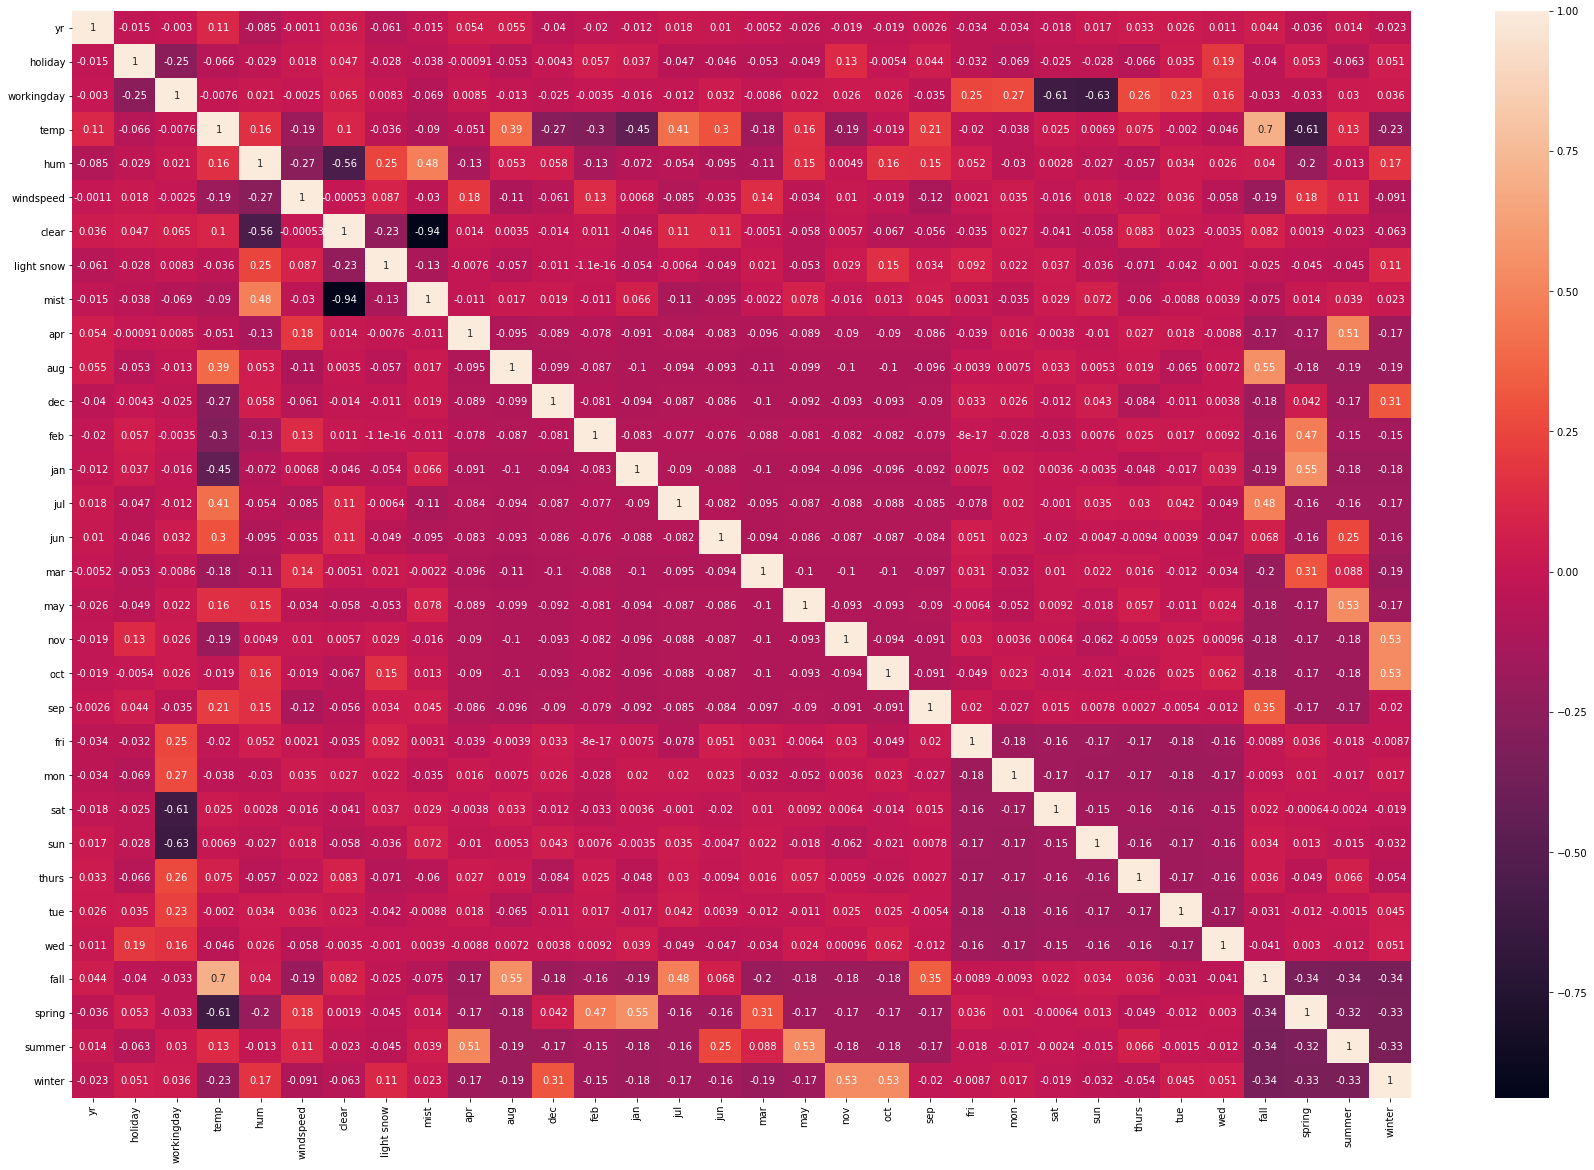

In [34]:
plt.figure(figsize=(30,20))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

 # Model building 

In [35]:
import statsmodels.api as sm  
X_train_sm =X_train
X_train_sm = sm.add_constant(X_train_sm)


In [36]:
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()


In [37]:
lr_model.params

const         0.159028
yr            0.230857
holiday      -0.135424
workingday   -0.060524
temp          0.445458
hum          -0.157315
windspeed    -0.183046
clear         0.156631
light snow   -0.094880
mist          0.097276
apr           0.020254
aug           0.041762
dec          -0.025415
feb          -0.017024
jan          -0.043357
jul          -0.014655
jun           0.021229
mar           0.020862
may           0.044319
nov          -0.021300
oct           0.026044
sep           0.106309
fri           0.046231
mon           0.021598
sat          -0.010088
sun          -0.003730
thurs         0.050094
tue           0.019932
wed           0.034990
fall          0.012398
spring       -0.031307
summer        0.054641
winter        0.123295
dtype: float64

In [38]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Mon, 10 May 2021   Prob (F-statistic):          4.33e-179
Time:                        10:59:38   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1590      0.035      4.526      0.000       0.090       0.228
yr             0.2309      0.008     28.387      0.000       0.215       0.247
holiday       -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday    -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp           0.4455      0.047      9.513      0.000       0.353       0.537
hum           -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed     -0.1830      0.026     -7.036      0.000      -0.234      -0.132
clear          0.1566      0.013     11.656      0.000       0.130       0.183
light snow    -0.0949      0.023     -4.199      0.000      -0.139      -0.050
mist           0.0973      0.014      6.805      0.000       0.069       0.125
apr            0.0203      0.021      0.955      0.340      -0.021       0.062
aug            0.0418      0.024      1.735      0.083      -0.006       0.089
dec           -0.0254      0.020     -1.261      0.208      -0.065       0.014
feb           -0.0170      0.024     -0.720      0.472      -0.064       0.029
jan           -0.0434      0.024     -1.784      0.075      -0.091       0.004
jul           -0.0147      0.026     -0.561      0.575      -0.066       0.037
jun            0.0212      0.022      0.982      0.326      -0.021       0.064
mar            0.0209      0.017      1.217      0.224      -0.013       0.055
may            0.0443      0.022      1.998      0.046       0.001       0.088
nov           -0.0213      0.023     -0.912      0.362      -0.067       0.025
oct            0.0260      0.022      1.166      0.244      -0.018       0.070
sep            0.1063      0.020      5.354      0.000       0.067       0.145
fri            0.0462      0.026      1.758      0.079      -0.005       0.098
mon            0.0216      0.026      0.824      0.411      -0.030       0.073
sat           -0.0101      0.047     -0.215      0.830      -0.102       0.082
sun           -0.0037      0.047     -0.080      0.936      -0.096       0.088
thurs          0.0501      0.026      1.891      0.059      -0.002       0.102
tue            0.0199      0.026      0.766      0.444      -0.031       0.071
wed            0.0350      0.026      1.369      0.172      -0.015       0.085
fall           0.0124      0.020      0.623      0.533      -0.027       0.051
spring        -0.0313      0.018     -1.731      0.084      -0.067       0.004
summer         0.0546      0.018      3.005      0.003       0.019       0.090
winter         0.1233      0.020      6.191      0.000       0.084       0.162
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.035
Sk

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,mar,inf
17,may,inf
30,summer,inf
29,spring,inf
28,fall,inf
27,wed,inf
26,tue,inf
25,thurs,inf
24,sun,inf
23,sat,inf


#  Residual analysis

In [40]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

653    0.751884
576    0.719246
426    0.522603
728    0.360318
482    0.620713
         ...   
526    0.729327
578    0.830065
53     0.254326
350    0.255869
79     0.295839
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

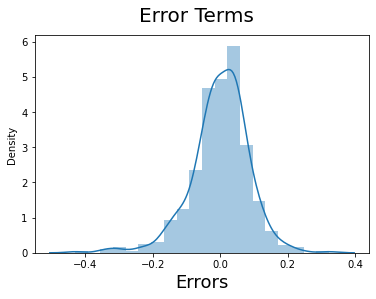

In [41]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)     

# Making predictions using the final model

In [42]:
num_vars = ['workingday','temp','holiday','hum','windspeed','yr']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test

,yr,holiday,workingday,temp,hum,windspeed,cnt,clear,light snow,mist,...,mon,sat,sun,thurs,tue,wed,fall,spring,summer,winter
184,-0.002531,-0.043288,0.0,29.793347,0.657364,0.084219,6043,0,0,1,...,0,0,0,0,0,1,1,0,0,0
535,-0.002416,-0.073679,1.0,32.082500,0.610133,0.153728,6211,1,0,0,...,0,0,0,1,0,0,0,0,1,0
299,-0.002531,-0.073679,0.0,19.270000,0.837699,0.334206,2659,0,0,1,...,0,1,0,0,0,0,0,0,0,1
221,-0.002531,-0.073679,1.0,31.433347,0.437098,0.339570,4780,1,0,0,...,0,0,0,0,0,0,1,0,0,0
152,-0.002531,-0.073679,0.0,29.315000,0.314298,0.537414,4968,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,-0.002416,-0.073679,1.0,10.899153,0.708888,0.287411,2947,0,0,1,...,0,0,0,0,1,0,0,1,0,0
702,-0.002416,-0.073679,1.0,19.509153,0.756118,0.283397,6606,1,0,0,...,0,0,0,0,0,1,0,0,0,1
127,-0.002531,-0.073679,1.0,21.661653,0.650923,0.069510,4333,1,0,0,...,0,0,0,0,1,0,0,0,1,0
640,-0.002416,-0.073679,1.0,26.957500,0.817947,0.052115,7572,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [43]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,clear,light snow,mist,...,mon,sat,sun,thurs,tue,wed,fall,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,-0.002476,-0.072569,0.639269,20.815737,0.638508,0.313350,4546.981735,0.652968,0.027397,0.319635,...,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.246575,0.255708,0.264840,0.232877
std,0.000058,0.005715,0.481313,7.689600,0.148974,0.159947,1898.633630,0.477117,0.163612,0.467403,...,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.432005,0.437258,0.442259,0.423633
min,-0.002531,-0.073679,0.000000,3.957390,0.261915,-0.042808,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.002531,-0.073679,0.000000,14.093750,0.527265,0.198517,3303.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.002531,-0.073679,1.000000,20.807500,0.627737,0.299459,4579.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-0.002416,-0.073679,1.000000,27.401653,0.743928,0.403048,5869.500000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,-0.002416,-0.043288,1.000000,34.815847,1.002146,0.807474,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,yr,holiday,workingday,temp,hum,windspeed,clear,light snow,mist,...,mon,sat,sun,thurs,tue,wed,fall,spring,summer,winter
184,1.0,-0.002531,-0.043288,0.0,29.793347,0.657364,0.084219,0,0,1,...,0,0,0,0,0,1,1,0,0,0
535,1.0,-0.002416,-0.073679,1.0,32.082500,0.610133,0.153728,1,0,0,...,0,0,0,1,0,0,0,0,1,0
299,1.0,-0.002531,-0.073679,0.0,19.270000,0.837699,0.334206,0,0,1,...,0,1,0,0,0,0,0,0,0,1
221,1.0,-0.002531,-0.073679,1.0,31.433347,0.437098,0.339570,1,0,0,...,0,0,0,0,0,0,1,0,0,0
152,1.0,-0.002531,-0.073679,0.0,29.315000,0.314298,0.537414,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,-0.002416,-0.073679,1.0,10.899153,0.708888,0.287411,0,0,1,...,0,0,0,0,1,0,0,1,0,0
702,1.0,-0.002416,-0.073679,1.0,19.509153,0.756118,0.283397,1,0,0,...,0,0,0,0,0,1,0,0,0,1
127,1.0,-0.002531,-0.073679,1.0,21.661653,0.650923,0.069510,1,0,0,...,0,0,0,0,1,0,0,0,1,0
640,1.0,-0.002416,-0.073679,1.0,26.957500,0.817947,0.052115,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [47]:
y_test_pred = lr_model.predict(X_test_sm)

In [54]:
from sklearn.metrics import r2_score

In [55]:
r2_score(y_true=y_test,y_pred=y_test_pred)

-5.735600350821136

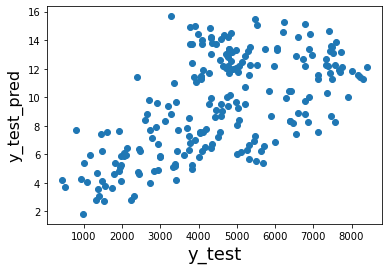

In [60]:
fig =plt.figure()
plt.scatter(y_test,y_test_pred)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_test_pred',fontsize=16)
plt.show()